## **Business Understanding**

### Introduction
Obesity has become a significant global health issue. Defined by the World Health Organization (WHO), obesity is identified when an individual's Body Mass Index (BMI) is greater than 30, while a BMI between 25 and 30 indicates overweight status. The ramifications of obesity extend beyond health, impacting demographics, labor, family, and the economy.

### Health Impact
Obesity substantially raises the risk of numerous chronic diseases, including cardiovascular disease, various cancers, musculoskeletal disorders, metabolic syndrome, diabetes mellitus, and kidney disease.

### Economic Impact
The economic burden of obesity is significant. In 2019, obesity accounted for $17 per capita in India and $940 in Australia. Projections indicate that by 2060, if preventive measures are not implemented, the economic impact of obesity could average 3.6% of GDP globally.

### WHO Strategy 
Recognizing the magnitude of the obesity problem, the WHO has classified it as a global epidemic and a major public health problem. 
So, various entities including public authorities, private institutions, are promoting prevention and treatment campaigns.
It primarily focused on improving physical activity and nutritional habits.


To improve obesity prevention strategies, the scientific community and health professionals are leveraging extensive datasets to gain deeper insights into obesity. This research aims to classify obesity levels using a tree-based machine learning approach based on physical activity and nutritional habits.

### Business Objective
Developing an accurate and reliable model for classifying obesity levels will enable more effective diagnosis, prevention, monitoring, and treatment of obesity. By understanding the specific roles of physical activity and nutritional habits, targeted interventions can be designed, leading to better health outcomes and reduced economic burdens associated with obesity.

## **Data Understanding**

### **Data Composition** 

The dataset provides information on individuals' demographic, dietary, and physical activity habits to perform classification of obesity levels.
Understanding attributes is important for preprocessing, analysis, and model building in next steps of the CRISP-DM process.

- Synthetic Data: 77% of the dataset was generated synthetically using the Weka tool and the SMOTE filter.
- Collected Data: 23% of the dataset was collected directly from users through a web platform.

### **Features**

The dataset includes the following 17 attributes:

**Gender:**

Type: Categorical
Description: Gender of the individual.
Values: "Male", "Female"

**Age:**

Type: Continuous
Description: Age of the individual in years.

**Height:**

Type: Continuous
Description: Height of the individual in meters.

**Weight:**

Type: Continuous
Description: Weight of the individual in kilograms.

**Family History with Overweight:**

Type: Binary
Description: Indicates if a family member has suffered or suffers from overweight.
Values: "Yes", "No"

**FAVC (Frequent High Caloric Food Consumption):**

Type: Binary
Description: Indicates if the individual frequently eats high caloric food.
Values: "Yes", "No"

**FCVC (Frequency of Vegetable Consumption):**

Type: Integer
Description: Indicates how frequently the individual eats vegetables in their meals.
Values: Integer values representing frequency.

**NCP (Number of Main Meals):**

Type: Continuous
Description: Number of main meals the individual has daily.

**CAEC (Food Consumption Between Meals):**

Type: Categorical
Description: Indicates if the individual eats any food between meals.
Values: "No", "Sometimes", "Frequently", "Always"


**SMOKE:**

Type: Binary
Description: Indicates if the individual smokes.
Values: "Yes", "No"

**CH2O (Water Consumption):**

Type: Continuous
Description: Amount of water the individual drinks daily in liters.

**SCC (Calorie Monitoring):**

Type: Binary
Description: Indicates if the individual monitors the calories they consume daily.
Values: "Yes", "No"

**FAF (Physical Activity Frequency):**

Type: Continuous
Description: Frequency of physical activity performed by the individual, measured in hours per week.

**TUE (Technology Use Time):**

Type: Integer
Description: Time the individual spends using technological devices daily.
Values: Integer values representing hours.

**CALC (Alcohol Consumption Frequency):**

Type: Categorical
Description: Frequency of alcohol consumption by the individual.
Values: "No", "Sometimes", "Frequently", "Always"

**MTRANS (Mode of Transportation):**

Type: Categorical
Description: Usual mode of transportation used by the individual.
Values: "Automobile", "Motorbike", "Bike", "Public Transportation", "Walking"

**NObesity (Obesity Level):**

Type: Categorical
Description: Target variable representing the obesity level of the individual.
Values: "Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"

**Import Libraries**

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

**Read the Data**

In [11]:
df = pd.read_csv('Data\ObesityDataSet_raw_and_data_sinthetic.csv')
df.shape

(2111, 17)

**Dataset Overview**

The dataset used in this study includes data for estimating obesity levels in individuals from Mexico, Peru, and Colombia. The data focuses on individuals' eating habits and physical conditions. The dataset comprises 17 attributes ( described above ) and 2111 records, with each record labeled with the class variable "NObesity" (Obesity Level). The obesity levels are categorized as follows:

- Insufficient Weight
- Normal Weight
- Overweight Level I
- Overweight Level II
- Obesity Type I
- Obesity Type II
- Obesity Type III

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Scatterplot to understand the Age and Height relationship along with Gender.

<Axes: xlabel='Age', ylabel='Height'>

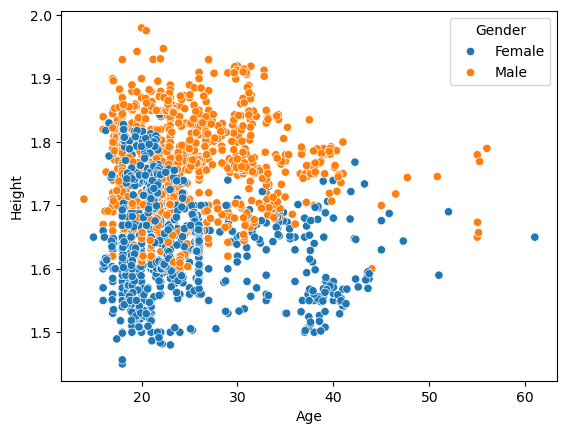

In [13]:
sns.scatterplot(x = 'Age', y = 'Height', data = df,  hue = 'Gender')

Trying to understand the Distribution of obesity levels. 

<Axes: xlabel='Age', ylabel='Height'>

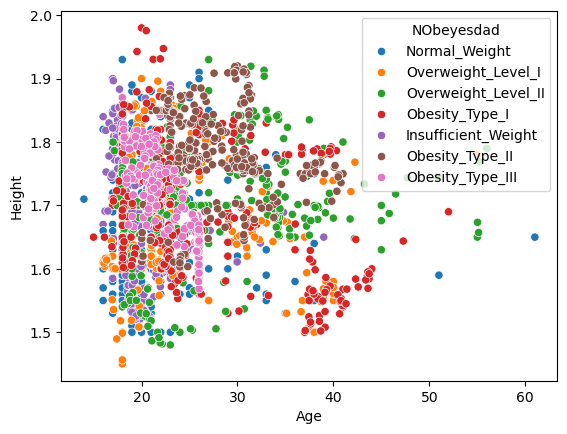

In [14]:
sns.scatterplot(x = 'Age', y = 'Height', data = df,  hue = 'NObeyesdad')

**Finding correlation of numeric variabels**

In [15]:
df.corr(numeric_only= True)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [16]:
df['SMOKE'].value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

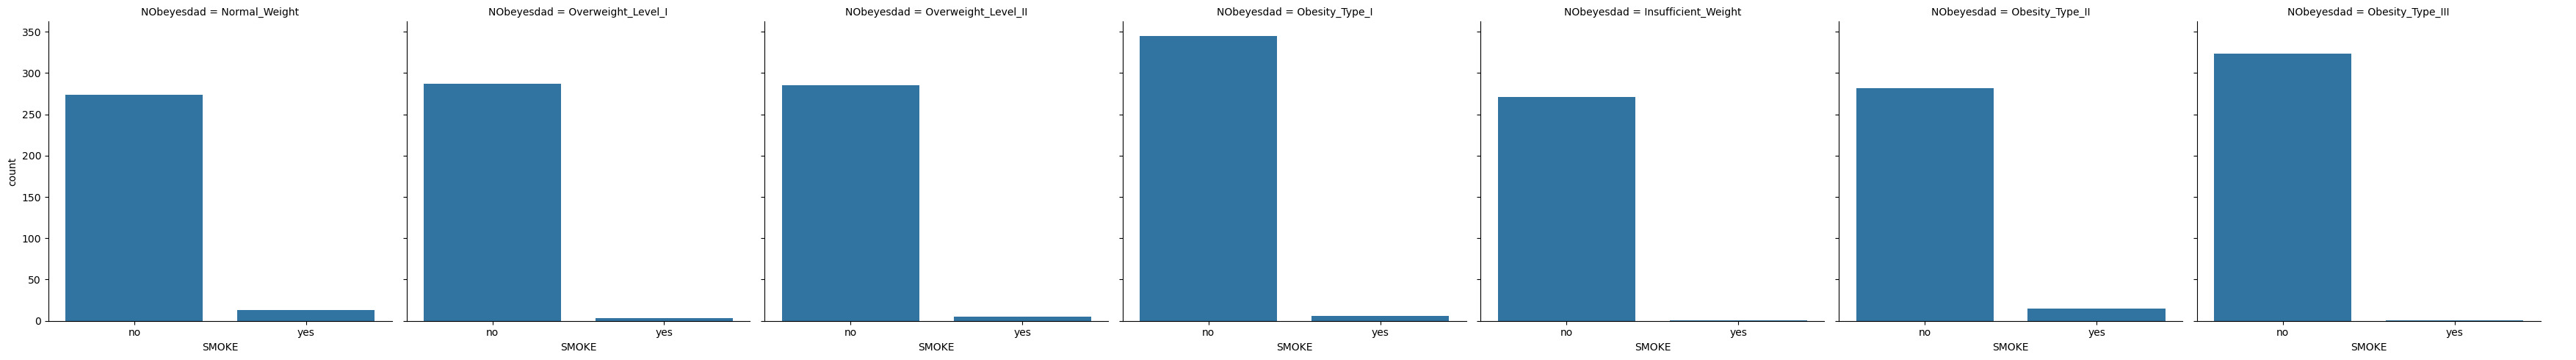

In [17]:
sns.catplot( x = 'SMOKE', data = df, col = 'NObeyesdad',  kind = 'count')

In [18]:
df.groupby(['NObeyesdad', 'SMOKE']).count()['MTRANS']

NObeyesdad           SMOKE
Insufficient_Weight  no       271
                     yes        1
Normal_Weight        no       274
                     yes       13
Obesity_Type_I       no       345
                     yes        6
Obesity_Type_II      no       282
                     yes       15
Obesity_Type_III     no       323
                     yes        1
Overweight_Level_I   no       287
                     yes        3
Overweight_Level_II  no       285
                     yes        5
Name: MTRANS, dtype: int64

In [19]:
for i in df.columns[df.dtypes == object]:
    print (df[i].value_counts() )

Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


## **Data Preparation**

### **Create BMI Feature and re-assign the levels**

In [20]:
df['BMI'] = df['Weight'] / df['Height']**2
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


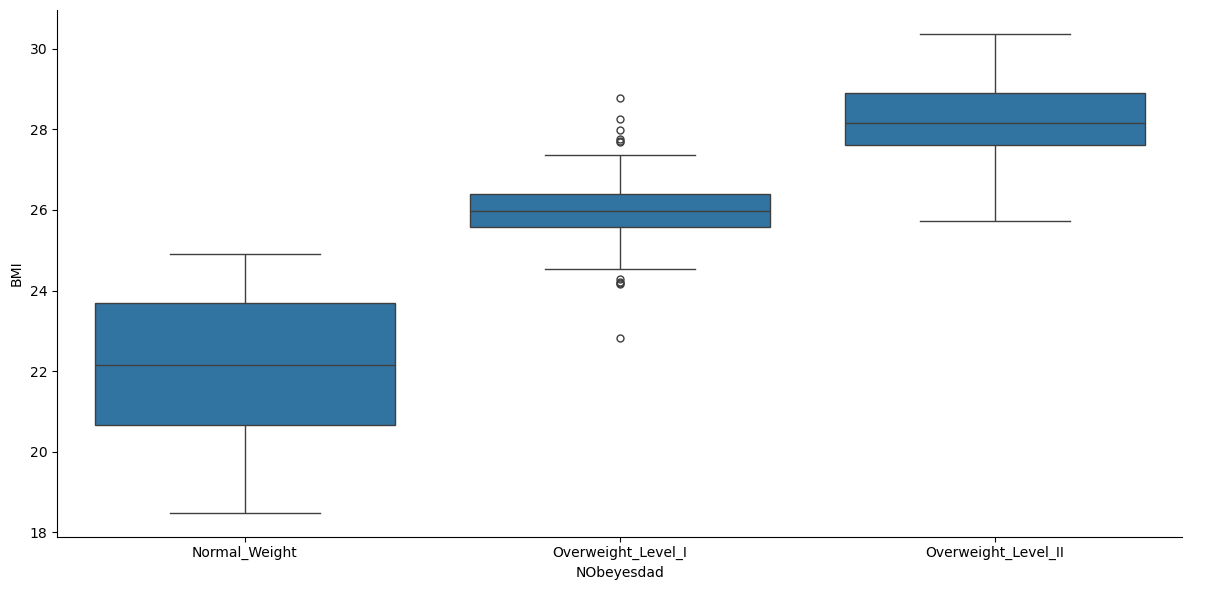

In [21]:
import seaborn as sns

sns.catplot( x = 'NObeyesdad', y = 'BMI',data = df[df['NObeyesdad'].isin(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II'])], kind = 'box', height=6, aspect=2);

**The above plot shows overlap between Levels - which means we need to create the levels correctly**

Obesity LVLs

- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

In [22]:
df.loc[df['BMI'] < 18.5, 'Level' ] =  'Underweight'
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9) , 'Level' ] =  'Normal'
df.loc[(df['BMI'] > 24.9) & (df['BMI'] <= 29.9), 'Level' ] =  'Overweight'
df.loc[(df['BMI'] > 29.9) & (df['BMI'] <= 34.9), 'Level' ] =  'Obesity_I'
df.loc[(df['BMI'] > 34.9) & (df['BMI'] <= 39.9), 'Level' ] =  'Obesity_II'

df.loc[df['BMI'] > 39.9, 'Level' ] =  'Obesity_III'

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526,Normal
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475,Obesity_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923,Obesity_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817,Obesity_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535,Obesity_III


<Axes: xlabel='family_history_with_overweight', ylabel='percent'>

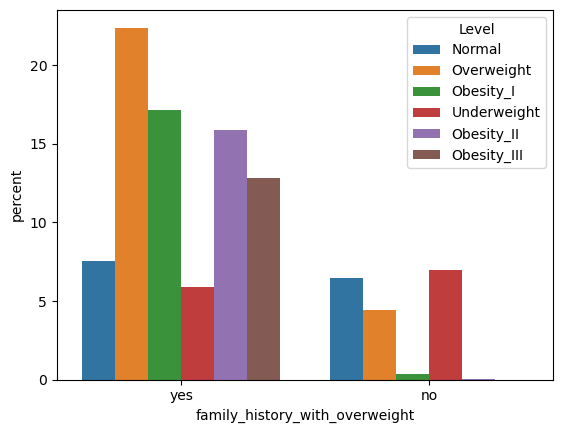

In [23]:
sns.countplot(df, x="family_history_with_overweight", hue="Level", stat="percent")


<Axes: xlabel='SMOKE', ylabel='percent'>

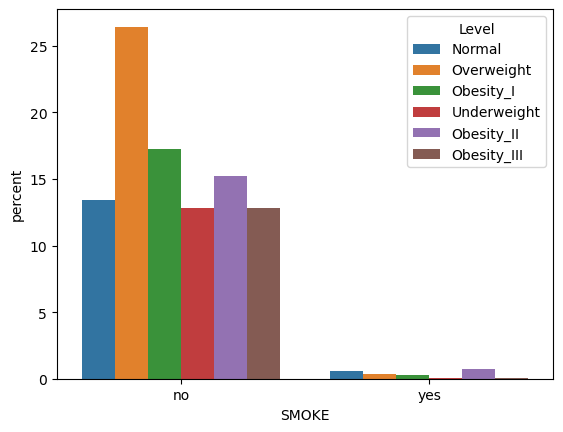

In [24]:
sns.countplot(df, x="SMOKE", hue="Level", stat="percent")

### **Preparing the data to remove Outliers**

In [25]:
ins_bmi = df[df['NObeyesdad'] == 'Insufficient_Weight']['BMI']

<Axes: ylabel='Density'>

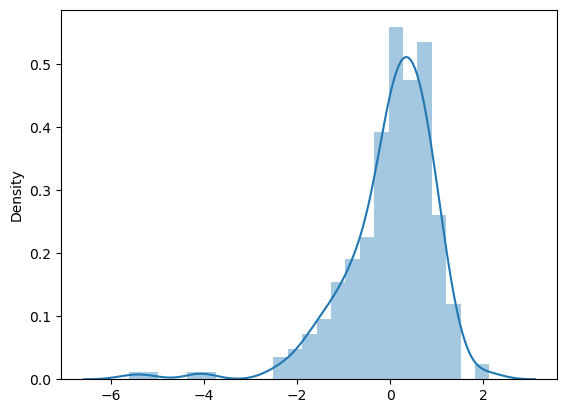

In [26]:
zdata = []
#get mean each column
mean = ins_bmi.mean()
#get standard deviation
std = ins_bmi.std()

for i in ins_bmi:
    zdata.append((i - mean)/ std)


sns.distplot(zdata)

In [27]:
import numpy as np
zadata = np.array(zdata)
threshold = 3
mask = np.abs(zdata) < threshold

np.ma.masked_array(zdata, mask=mask)


masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, -5.230853761204775, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --,
                   -4.006928330846782, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --,
                   -5.603394580548874, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --

In [28]:
df.loc[df['NObeyesdad'] == 'Insufficient_Weight', 'Outliers'] = mask

In [29]:
df = df[df['Outliers'] != False]
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Level,Outliers
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526,Normal,NaN
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal,NaN
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal,NaN
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852,Overweight,NaN
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475,Obesity_III,NaN
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923,Obesity_III,NaN
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817,Obesity_III,NaN
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535,Obesity_III,NaN


### **Some Classes with uneven Gender Distribution**

In [30]:
df.groupby(['NObeyesdad', 'Gender']).count()['Age']

NObeyesdad           Gender
Insufficient_Weight  Female    170
                     Male       98
Normal_Weight        Female    141
                     Male      146
Obesity_Type_I       Female    156
                     Male      195
Obesity_Type_II      Female      2
                     Male      295
Obesity_Type_III     Female    323
                     Male        1
Overweight_Level_I   Female    145
                     Male      145
Overweight_Level_II  Female    103
                     Male      187
Name: Age, dtype: int64

| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

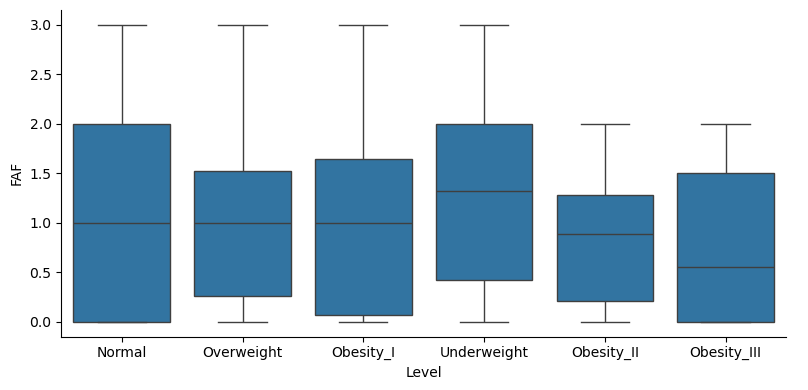

In [51]:
sns.catplot(
    data=df, x="Level", y="FAF", 
    kind="box", height=4, aspect=2,
)

In [52]:
dfv1 = df.groupby(['Level', 'MTRANS'])['Gender'].count().reset_index()
dfv1.columns = ['Level', 'Transport', 'Count']
dfv1

,Level,Transport,Count
0,Normal,Automobile,48
1,Normal,Bike,4
2,Normal,Motorbike,6
3,Normal,Public_Transportation,206
4,Normal,Walking,32
5,Obesity_I,Automobile,109
6,Obesity_I,Motorbike,3
7,Obesity_I,Public_Transportation,255
8,Obesity_I,Walking,3
9,Obesity_II,Automobile,97


In [53]:
fig = px.bar(dfv1, x='Level', y='Count', color = 'Transport')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()

In [54]:
# Frequent consumption of high caloric food

dfv2 = df.groupby(['Level', 'FAVC'])['Gender'].count().reset_index()
dfv2.columns = ['Level', 'FAVC', 'Count']
fig = px.bar(dfv2, x='Level', y='Count', color = 'FAVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()

In [55]:
# Vegetables consumptions

dfv3 = df.groupby(['Level', 'FCVC'])['Gender'].count().reset_index()
dfv3.columns = ['Level', 'FCVC', 'Count']
fig = px.bar(dfv3, x='Level', y='Count', color = 'FCVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()


### **Remove the Unnecessary columns from the Dataframe**

In [32]:
df = df.drop(columns = ['NObeyesdad', 'BMI', 'Outliers', 'Weight'])
df

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Level
0,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_III
2107,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_III
2108,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_III
2109,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_III


## **Modelling**

- At this phase, we will develop machine learning models to classify obesity levels based on individuals' physical activity and nutritional habits. 
- Two models were implemented and compared: **Random Forest** and **XGBoost**.

Models Tried
1. Random Forest

- Description: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- Implementation: The model was implemented using the RandomForestClassifier from the sklearn library.
- Key Parameters: Number of trees (n_estimators), maximum depth of the trees (max_depth), and other hyperparameters were tuned using cross-validation.

2. XGBoost

- Description: XGBoost (Extreme Gradient Boosting) is a powerful ensemble method that builds trees sequentially, with each tree correcting the errors of the previous ones. It is known for its speed and performance.
- Implementation: The model was implemented using the XGBClassifier from the xgboost library.
- Key Parameters: Learning rate (eta), maximum depth of the trees (max_depth), number of boosting rounds (n_estimators), and regularization parameters were tuned to optimize performance.

### **Random Forest**
- 1st attempt to perform Hyperparameter tuning with Random Forest with one variable ( Max Depth )
- However this did not give much information about as it was very simple analysis ( one variable only)

In [57]:
###################
# Random Forest   #
###################

X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()

cross_val_score(rf, X_train, y_train, cv=10)

train_scores = []
test_scores = []


for i in range(1, 20, 1):

    rf = RandomForestClassifier(max_depth= i )
    rf.fit(X_train, y_train)




    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))  

    y_pred = rf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred))



scores = pd.DataFrame({'train_scores': train_scores, 'test_scores': test_scores})

scores

,train_scores,test_scores
0,0.302077,0.284360
1,0.468249,0.431280
2,0.591691,0.592417
3,0.690208,0.635071
4,0.757270,0.699052
5,0.812463,0.739336
6,0.854006,0.746445
7,0.900297,0.784360
8,0.937685,0.798578
9,0.960831,0.808057


**Based on one variable the overfitting is not very clear. Therefore, we will do hyperparameter tuning with more features**

In [58]:
scores['index'] = scores.index
scores= pd.melt(scores, id_vars = ['index'])
px.scatter(scores, x = 'index', y = 'value', color = 'variable' )

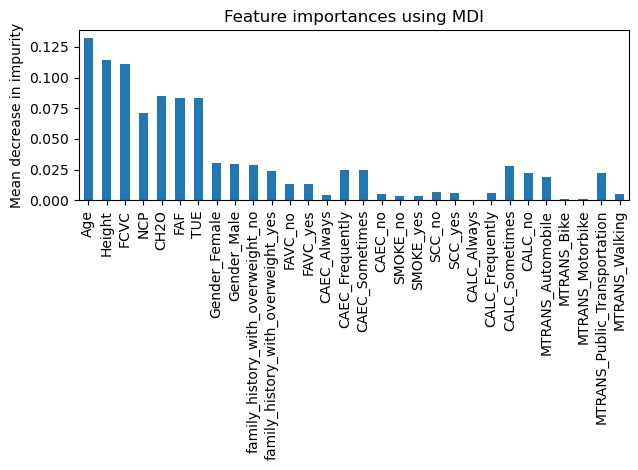

In [59]:
importances = rf.feature_importances_

feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [60]:
forest_importances

Age                                   0.131965
Height                                0.114039
FCVC                                  0.111200
NCP                                   0.071180
CH2O                                  0.084639
FAF                                   0.083359
TUE                                   0.083537
Gender_Female                         0.030094
Gender_Male                           0.029309
family_history_with_overweight_no     0.028391
family_history_with_overweight_yes    0.023844
FAVC_no                               0.013586
FAVC_yes                              0.013224
CAEC_Always                           0.004273
CAEC_Frequently                       0.024977
CAEC_Sometimes                        0.024318
CAEC_no                               0.005080
SMOKE_no                              0.003272
SMOKE_yes                             0.003166
SCC_no                                0.006270
SCC_yes                               0.005849
CALC_Always  

**Hyper Parameter Tuning - Random Forest**

In [61]:
#############################
# RF Hyper parameter tuning
#############################

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8], 
    'max_features': ['auto', 'sqrt', 'log2']
}



rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8073746777588905


In [62]:
# Get the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Display all parameter combinations and scores
params_and_scores = results[['params', 'mean_test_score', 'rank_test_score']]
params_and_scores

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.634123,1421
1,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.645982,1320
2,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.646927,1316
3,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.655938,1204
4,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.652135,1223
...,...,...,...
1495,"{'max_depth': 30, 'max_features': 'log2', 'min...",0.702462,1145
1496,"{'max_depth': 30, 'max_features': 'log2', 'min...",0.717167,1099
1497,"{'max_depth': 30, 'max_features': 'log2', 'min...",0.727145,999
1498,"{'max_depth': 30, 'max_features': 'log2', 'min...",0.728088,974


In [ ]:
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8], 
    'max_features': ['auto', 'sqrt', 'log2']
}


#param_grid = {
#    'n_estimators': [50],
#    'max_depth': [5],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2], 
#    'max_features': ['auto']
#}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X, y)

results = pd.DataFrame(grid_search.cv_results_)

# Display all parameter combinations and scores
params_and_scores = results[['params', 'mean_test_score', 'rank_test_score']]




train_score = []
test_score = []

max_depths = []
max_featuress = []
min_samples_leafs = []
min_samples_splits = []
n_estimatorss = []



In [ ]:
for p in params_and_scores['params']:
    rf = RandomForestClassifier(**p)
    rf.fit(X_train, y_train)

    max_depth = p['max_depth']
    max_features = p['max_features']
    min_samples_leaf = p['min_samples_leaf']
    min_samples_split = p['min_samples_split']
    n_estimators = p['n_estimators']

    train_score.append(rf.score(X_train,y_train))
    test_score.append(rf.score(X_test,y_test))

    max_depths.append(max_depth)
    max_featuress.append(max_features)
    min_samples_leafs.append(min_samples_leaf)
    min_samples_splits.append(min_samples_split)
    n_estimatorss.append(n_estimators)



    



dict = {'max_depths': max_depths, 'max_features': max_featuress, 'mn_samples_leafs': min_samples_leafs, \
        'min_samples_split': min_samples_splits, 'n_estimators': n_estimatorss, 'train_score': train_score,\
        'test_score': test_score} 
   
df_rf = pd.DataFrame(dict)

df_rf.to_csv('RF_train_test_score.csv')

In [ ]:
df_rf = pd.read_csv('RF_train_test_score.csv', index_col= 0)

df_rf = df_rf.loc[(df_rf['train_score'] < 1) & (df_rf['test_score'] > 0.82), : ]
df_rf = df_rf.reset_index(drop = True)
df_rf['index'] = df_rf.index


df_rf
df_rf1 = pd.melt(df_rf, id_vars=['index'], value_vars=['train_score', 'test_score'])
df_rf1

,index,variable,value
0,0,train_score,0.934718
1,1,train_score,0.932344
2,2,train_score,0.998220
3,3,train_score,0.997626
4,4,train_score,0.998813
...,...,...,...
315,155,test_score,0.834123
316,156,test_score,0.824645
317,157,test_score,0.824645
318,158,test_score,0.824645


**Checking Train vs Test Score to assess Overfitting status**

In [ ]:
px.scatter(df_rf1, x = 'index', y = 'value', color= 'variable')

In [ ]:
df_rf.sort_values(by = 'test_score', ascending= False)

,max_depths,max_features,mn_samples_leafs,min_samples_split,n_estimators,train_score,test_score,index
125,30,sqrt,1,5,100,0.988724,0.860190,125
56,20,auto,1,5,200,0.984570,0.855450,56
71,20,sqrt,1,5,100,0.984570,0.853081,71
91,20,log2,1,5,200,0.986944,0.853081,91
23,15,sqrt,1,2,200,0.998813,0.853081,23
...,...,...,...,...,...,...,...,...
122,30,auto,4,5,100,0.913353,0.822275,122
120,30,auto,2,15,20,0.893769,0.822275,120
118,30,auto,2,10,100,0.929970,0.822275,118
103,30,auto,1,5,20,0.980415,0.822275,103


### **XGBoost**

**Visualising Feature importances in XGBoost**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# declare parameters
params = {
            'objective':'multi:softprob',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           

params = {
            'objective':'multi:softprob',
            'verbosity' : 1
}


# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy_score(y_pred, y_test)

In [ ]:
xgb.plot_importance(xgb_clf)

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Levels'].values) 

        

        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Levels'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        

    print ("\nModel Report")
    print ("Accuracy : " , accuracy_score(dtrain['Levels'].values, dtrain_predictions))

    xgb.plot_importance(xgb_clf)

In [ ]:
dtrain = X.copy()
dtrain['Levels'] = y

predictors = [x for x in dtrain.columns if x not in ['Levels']]



xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 num_class = 6,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)



modelfit(xgb1, dtrain, predictors)

**Hyper Parameter tuning - XGBoost**

In [ ]:
def calculate_acc(objective, max_depth, learning_rate, n_estimators):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #{'learning_rate': 1, 'max_depth': 8, 'n_estimators': 20}
    # declare parameters
    params = {
                'objective':objective,
                'max_depth': max_depth,
                #'alpha': 10,
                'learning_rate': learning_rate,
                'n_estimators':n_estimators
            }         




    # instantiate the classifier 
    xgb_clf = XGBClassifier(**params)


    # fit the classifier to the training data
    xgb_clf.fit(X_train, y_train)
    train_score = accuracy_score(xgb_clf.predict(X_train), y_train)


    y_pred = xgb_clf.predict(X_test)
    test_score = accuracy_score(y_pred, y_test)
    auc_score = roc_auc_score(y_pred, y_test)


    return train_score, test_score

In [ ]:
estimator = XGBClassifier(
    objective= 'multi:softprob',
    nthread=4,
    seed=42
)


parameters = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'max_depth': range (2, 10, 2),
    'n_estimators': range(20, 100, 20),
    'learning_rate': [1, 0.01, 0.1],
    
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc_ovr',
    n_jobs = 10,
    cv = 5,
    verbose=True, 
    error_score="raise"
)


grid_search.fit(X, y)



print("Grid scores on development set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']


means_res = []
learning_rate = []
max_depth =[]
n_estimators = []
objective = []
train_acc_score = []
test_acc_score = []


for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

    means_res.append(mean)
    learning_rate.append(params['learning_rate'])
    max_depth.append(params['max_depth'])
    n_estimators.append(params['n_estimators'])
    objective.append(params['objective'])

    train_score, test_score = calculate_acc(params['objective'], params['max_depth'],\
         params['learning_rate'], params['n_estimators'])

    train_acc_score.append(train_score)
    test_acc_score.append(test_score)




dict = {'CV_Score': means_res, 'learning_rate': learning_rate, 'max_depth': max_depth,\
      'n_estimators': n_estimators,'objective': objective,\
        'Train_Score': train_acc_score, 'Test_Acc_Score': test_acc_score } 
   
df = pd.DataFrame(dict)


df.to_csv('dataframe.csv', index = False)


In [43]:
df_xgb = pd.read_csv('dataframe.csv', index_col= 0)
df_xgb

,learning_rate,max_depth,n_estimators,objective,Train_Score,Test_Acc_Score
CV_Score,,,,,,
0.922004,1.00,2,20,multi:softprob,0.867062,0.767773
0.922004,1.00,2,20,multi:softmax,0.867062,0.767773
0.932571,1.00,2,40,multi:softprob,0.922255,0.793839
0.932571,1.00,2,40,multi:softmax,0.922255,0.793839
0.934862,1.00,2,60,multi:softprob,0.957270,0.791469
...,...,...,...,...,...,...
0.947555,0.05,8,140,multi:softmax,0.999407,0.845972
0.948472,0.05,8,160,multi:softprob,1.000000,0.845972
0.948472,0.05,8,160,multi:softmax,1.000000,0.845972


In [51]:
df_xgb = pd.read_csv('dataframe.csv', index_col= 0)

df_xgb = df_xgb.loc[(df_xgb['Train_Score'] < 1) & (df_xgb['Test_Acc_Score'] > 0.8), : ]
df_xgb = df_xgb.reset_index(drop = True)
df_xgb['index'] = df_xgb.index


df_xgb
df_xgb1 = pd.melt(df_xgb, id_vars=['index'], value_vars=['Train_Score', 'Test_Acc_Score'])
df_xgb1

,index,variable,value
0,0,Train_Score,0.971513
1,1,Train_Score,0.971513
2,2,Train_Score,0.985757
3,3,Train_Score,0.985757
4,4,Train_Score,0.993472
...,...,...,...
287,141,Test_Acc_Score,0.834123
288,142,Test_Acc_Score,0.843602
289,143,Test_Acc_Score,0.843602
290,144,Test_Acc_Score,0.845972


In [53]:
df_xgb.sort_values(by = 'Test_Acc_Score', ascending= False)

,learning_rate,max_depth,n_estimators,objective,Train_Score,Test_Acc_Score,index
121,0.1,5,160,multi:softmax,0.998220,0.857820,121
120,0.1,5,160,multi:softprob,0.998220,0.857820,120
71,0.6,5,20,multi:softmax,0.992878,0.855450,71
70,0.6,5,20,multi:softprob,0.992878,0.855450,70
38,0.8,5,20,multi:softprob,0.999407,0.853081,38
...,...,...,...,...,...,...,...
125,0.1,8,20,multi:softmax,0.966172,0.800948,125
124,0.1,8,20,multi:softprob,0.966172,0.800948,124
40,0.7,2,60,multi:softprob,0.931157,0.800948,40
3,1.0,2,120,multi:softmax,0.985757,0.800948,3


In [52]:
px.scatter(df_xgb1, x = 'index', y = 'value', color= 'variable')

## **Evaluation**

The aim of the evaluation phase was to assess the performance of the Random Forest and XGBoost models in classifying obesity levels based on physical activity and nutritional habits. The models were evaluated using two key metrics: Accuracy and Cohen's Kappa.

- Accuracy : Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.

- Cohen's Kappa: Cohen's Kappa is a statistical measure that evaluates the inter-rater agreement for categorical items while considering the possibility of agreement occurring by chance.


We took the best parameters for both XGBoost and Random Forest from Modelling part to move ahead with evaluation step.




### **XGBoost**

In [33]:
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)
le = LabelEncoder()
le.fit(y)


le.classes_

y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# index 518 

params = {
            'objective':'multi:softprob',
            'max_depth': 5,
            'learning_rate': 0.1,
            'n_estimators':160
        }         
           

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
acc_xgb = accuracy_score(y_pred, y_test)

xgb_kappa_score = cohen_kappa_score(y_test, y_pred)
print('Kappa Score: ',  xgb_kappa_score)


print('\nAccuracy Score : ', acc_xgb) 

Kappa Score:  0.8265385116017785

Accuracy Score :  0.8578199052132701


In [34]:
cm_xgb = confusion_matrix(y_test, y_pred)
cm_xgb

array([[46,  3,  0,  0, 12,  4],
       [ 6, 56,  3,  0,  6,  0],
       [ 2,  1, 69,  3,  1,  0],
       [ 0,  0,  1, 48,  0,  0],
       [10,  3,  1,  0, 94,  0],
       [ 2,  0,  0,  0,  2, 49]], dtype=int64)

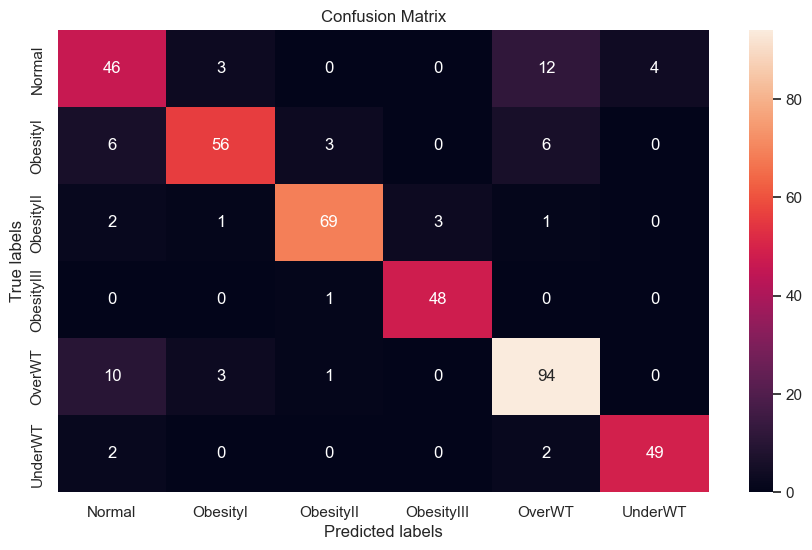

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt     
sns.set_theme(rc={'figure.figsize':(10.5,6)})
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation





# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'ObesityI', 'ObesityII', 'ObesityIII', 'OverWT',
       'UnderWT']); ax.yaxis.set_ticklabels(['Normal', 'ObesityI', 'ObesityII', 'ObesityIII', 'OverWT',
       'UnderWT']);

### **Random Forest**

In [36]:
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)
le = LabelEncoder()
le.fit(y)


le.classes_

y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





params = {
           'n_estimators':20,
            'max_depth': 30,
            'max_features': 'sqrt',
            'min_samples_leaf': 1, 
            'min_samples_split': 10

        }         
           

# instantiate the classifier 
xgb_clf = RandomForestClassifier(**params, random_state=42)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
rf_acc = accuracy_score(y_pred, y_test)

cm_rf = confusion_matrix(y_test, y_pred)
cm_rf

rf_kappa_score = cohen_kappa_score(y_test, y_pred)
print('Kappa Score: ',  rf_kappa_score)

print('\nAcc Score: ',  rf_acc)

Kappa Score:  0.7593822775766486

Acc Score:  0.8033175355450237


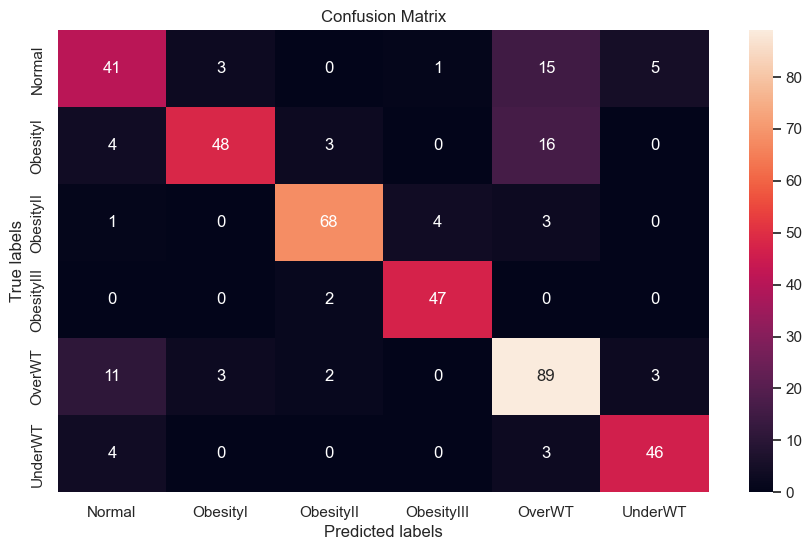

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt     
sns.set_theme(rc={'figure.figsize':(10.5,6)})
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation





# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'ObesityI', 'ObesityII', 'ObesityIII', 'OverWT',
       'UnderWT']); ax.yaxis.set_ticklabels(['Normal', 'ObesityI', 'ObesityII', 'ObesityIII', 'OverWT',
       'UnderWT']);

### **Comparison between RF and XGBoost**

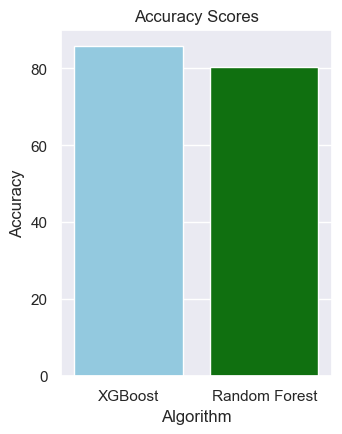

In [38]:
data = pd.DataFrame({
    'Algorithm': ['XGBoost', 'Random Forest'],
    'Accuracy': [85.78, 80.33]
})
sns.set_theme(rc={'figure.figsize':(3.5,4.5)})

color_dict = {'XGBoost': 'skyblue', 'Random Forest': 'green'}


# Create barplot
sns.barplot(x='Algorithm', y='Accuracy', data=data, palette=color_dict)
plt.title('Accuracy Scores')

# Show plot
plt.show()

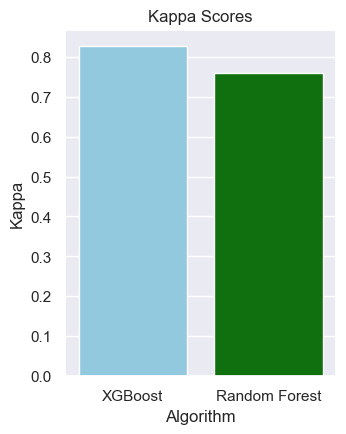

In [39]:
data = pd.DataFrame({
    'Algorithm': ['XGBoost', 'Random Forest'],
    'Kappa': [xgb_kappa_score, rf_kappa_score]
})
sns.set_theme(rc={'figure.figsize':(3.5,4.5)})
color_dict = {'XGBoost': 'skyblue', 'Random Forest': 'green'}

# Create barplot
sns.barplot(x='Algorithm', y='Kappa', data=data, palette=color_dict)
plt.title('Kappa Scores')

# Show plot
plt.show()